In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("kc_house_data.csv")

In [4]:
from matplotlib import style
#style.use('dark_background')
style.use('seaborn-ticks')

In [5]:
#df = pd.read_csv('/content/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**EDA**

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\TURBULENCE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

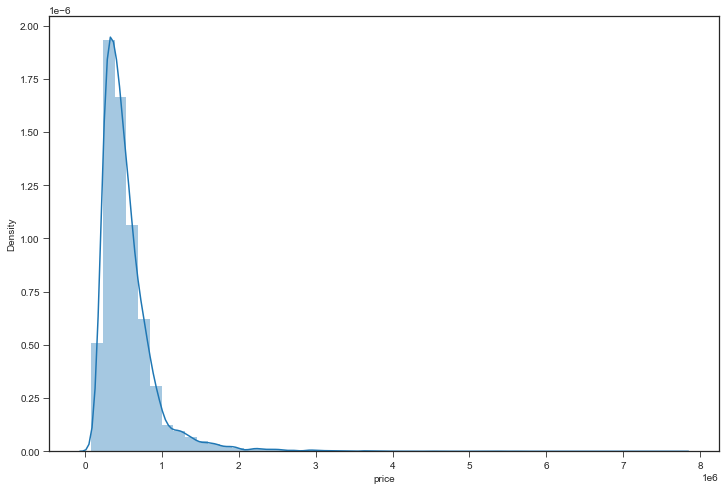

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\TURBULENCE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

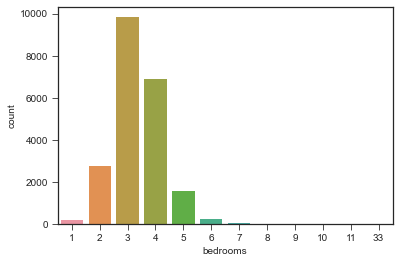

In [13]:
sns.countplot(df['bedrooms'])

In [14]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [15]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [16]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

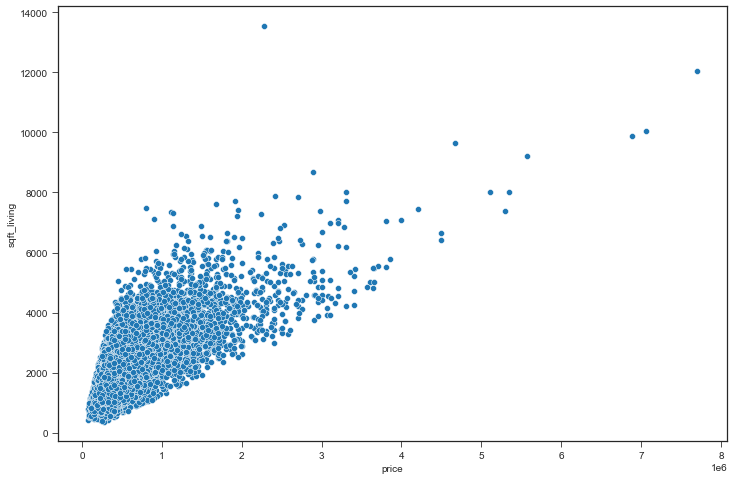

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

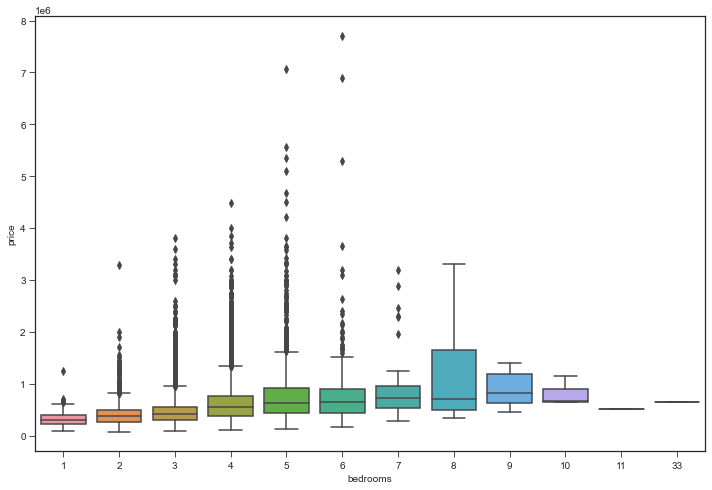

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

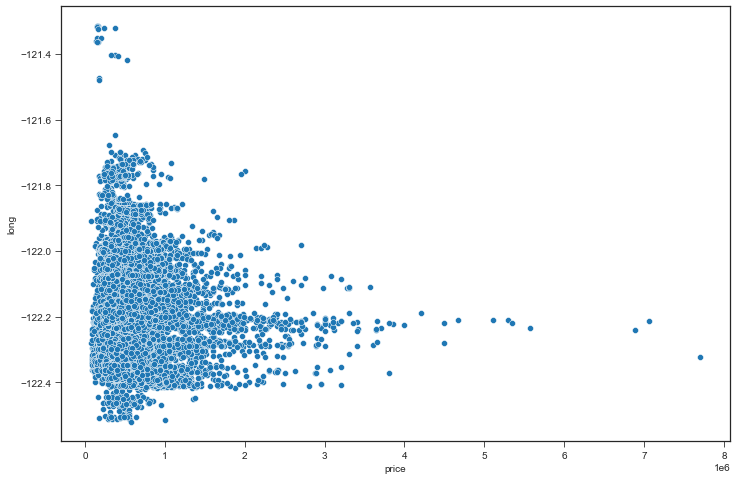

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

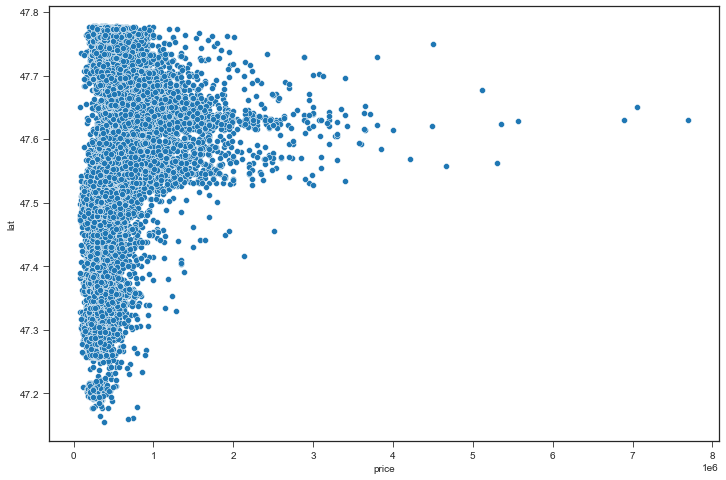

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

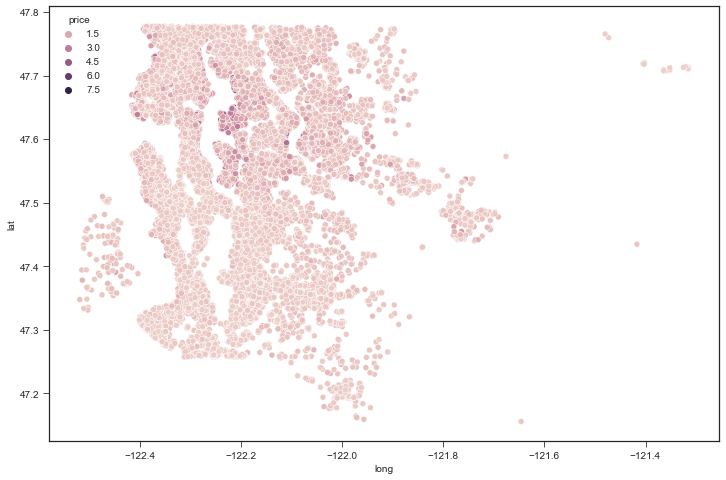

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [22]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [23]:
len(df) * (0.01)

215.97

In [24]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

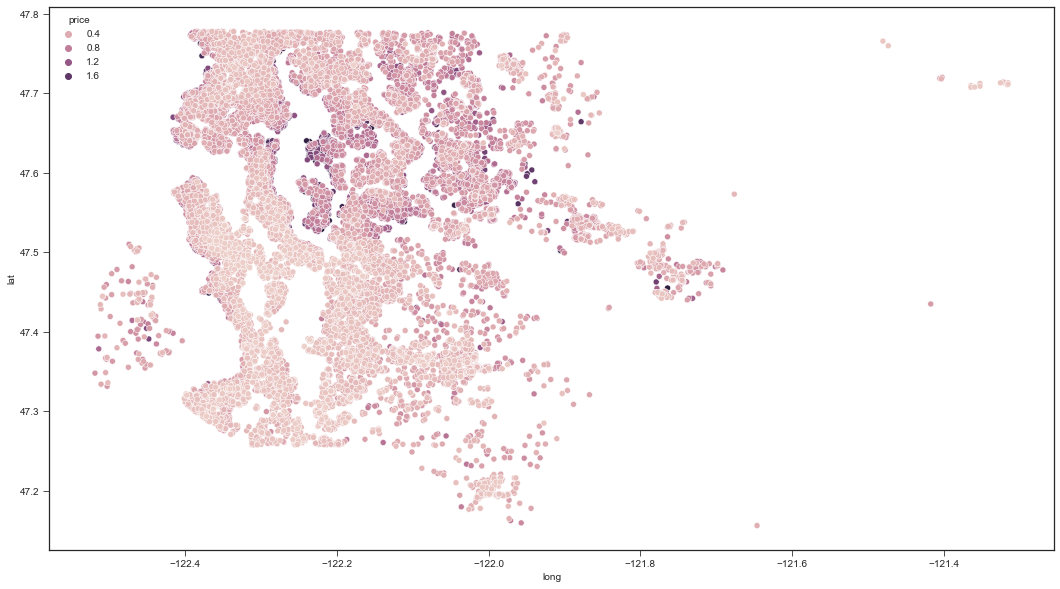

In [25]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

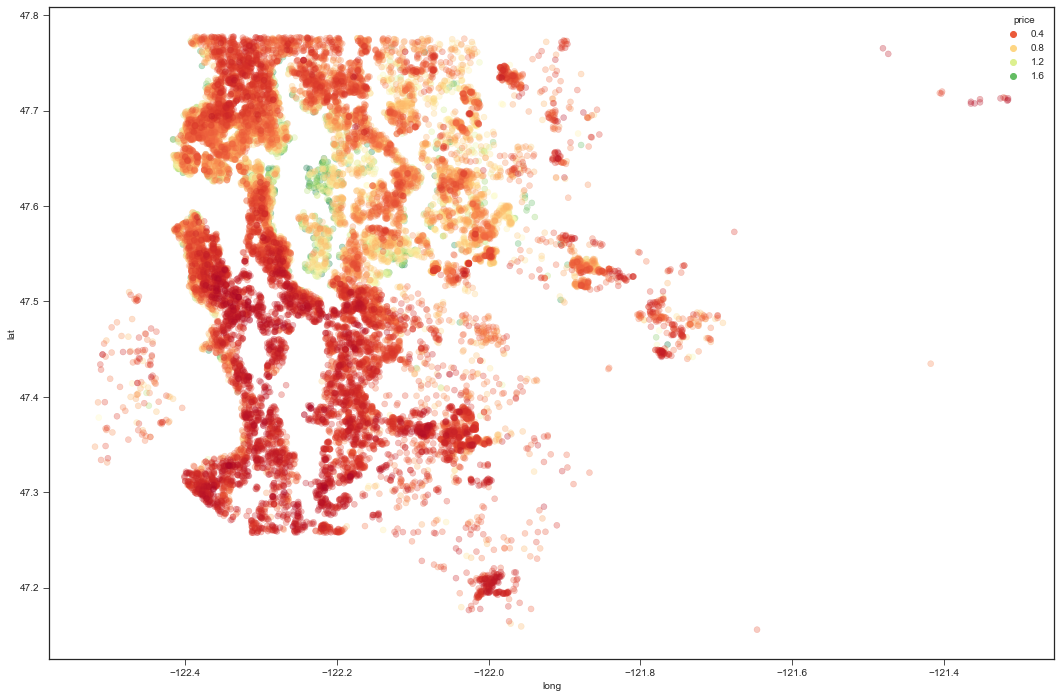

In [26]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',palette='RdYlGn',alpha=0.3,edgecolor=None)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

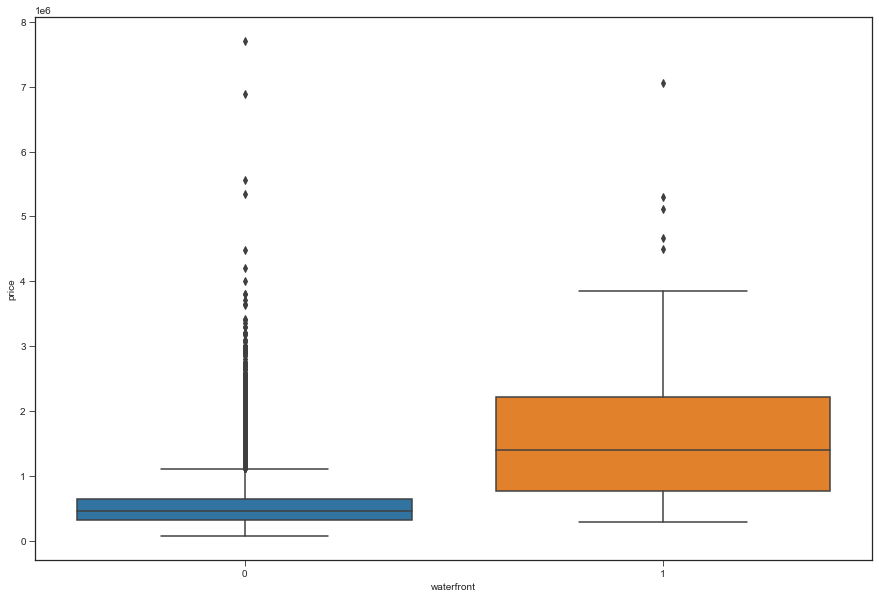

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(x='waterfront', y='price', data=df)

## FEATURE ENGINEERING

In [28]:
df=df.drop('id',axis=1)

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df['month']=df['date'].apply(lambda date:date.month)

In [33]:
df['year']=df['date'].apply(lambda date:date.year)

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year', ylabel='price'>

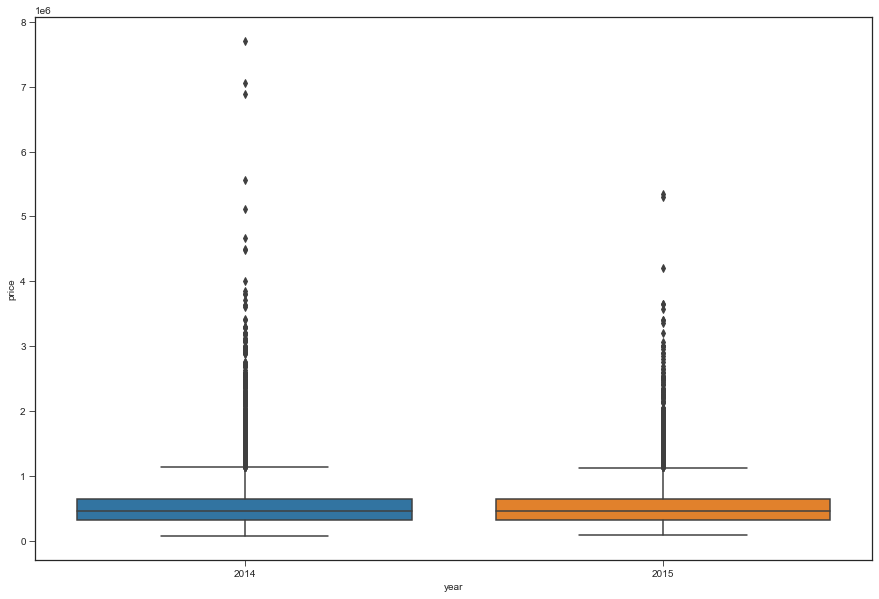

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

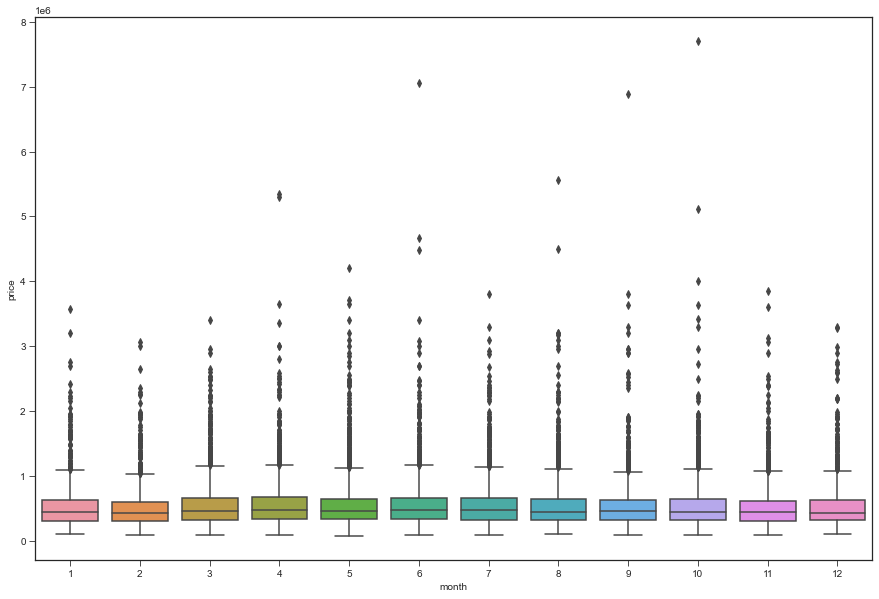

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

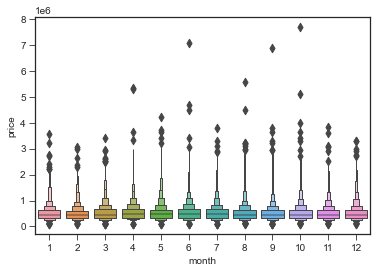

In [37]:
sns.boxenplot(x = "month", y = "price", data =df)

<AxesSubplot:xlabel='month'>

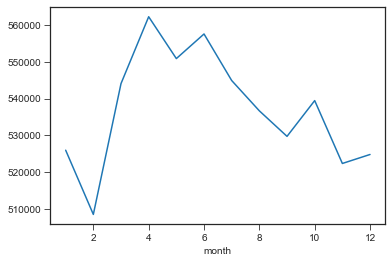

In [38]:
df.groupby("month").mean()["price"].plot()

<AxesSubplot:xlabel='year'>

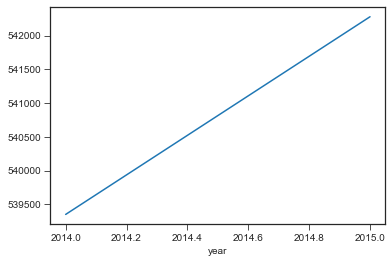

In [39]:
df.groupby("year").mean()["price"].plot()

<AxesSubplot:xlabel='year,month'>

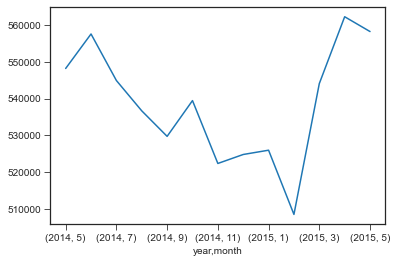

In [40]:
df.groupby(['year','month']).mean()['price'].plot()

In [41]:
df = df.drop("date",axis=1)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [44]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [45]:
df = df.drop('zipcode',axis=1)

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [47]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## SCALE and TRAIN TEST SPLIT

In [50]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
X_test

array([[0.2       , 0.03333333, 0.03644647, ..., 0.0088806 , 0.09090909,
        1.        ],
       [0.2       , 0.06666667, 0.08656036, ..., 0.00581357, 0.81818182,
        0.        ],
       [0.3       , 0.23333333, 0.1078208 , ..., 0.05679519, 0.18181818,
        1.        ],
       ...,
       [0.2       , 0.16666667, 0.09339408, ..., 0.00855667, 0.45454545,
        0.        ],
       [0.4       , 0.4       , 0.18147304, ..., 0.00452128, 0.63636364,
        0.        ],
       [0.1       , 0.16666667, 0.0523918 , ..., 0.01849063, 0.36363636,
        0.        ]])

In [61]:
X_train.shape

(15117, 19)

In [62]:
X_train.shape[1]

19

## CREATING MODEL

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))
model.add(Dense(19, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")




In [64]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=400 )

Epoch 1/400
119/119 [==============================] - 6s 8ms/step - loss: 430074802722.1334
Epoch 2/400
119/119 [==============================] - 1s 7ms/step - loss: 437383936136.5333
Epoch 3/400
119/119 [==============================] - 1s 9ms/step - loss: 429405376238.9333: 
Epoch 4/400
119/119 [==============================] - 1s 6ms/step - loss: 395405761194.6667
Epoch 5/400
119/119 [==============================] - 1s 7ms/step - loss: 269183848174.9333
Epoch 6/400
119/119 [==============================] - 1s 7ms/step - loss: 145116891136.0000
Epoch 7/400
119/119 [==============================] - 1s 10ms/step - loss: 99493843865.6000: 0s - loss: 98934827
Epoch 8/400
119/119 [==============================] - 1s 9ms/step - loss: 90133492189.8667
Epoch 9/400
119/119 [==============================] - 1s 7ms/step - loss: 87981717845.3333
Epoch 10/400
119/119 [==============================] - 1s 8ms/step - loss: 96823020202.6667
Epoch 11/400
119/119 [===========================

119/119 [==============================] - 1s 9ms/step - loss: 33156398216.5333
Epoch 87/400
119/119 [==============================] - 1s 9ms/step - loss: 33453279607.4667
Epoch 88/400
119/119 [==============================] - 1s 7ms/step - loss: 36647685580.8000
Epoch 89/400
119/119 [==============================] - 1s 9ms/step - loss: 36407642316.8000A: 0s - loss: 3706110114
Epoch 90/400
119/119 [==============================] - 1s 8ms/step - loss: 35377381256.5333
Epoch 91/400
119/119 [==============================] - ETA: 0s - loss: 32126714002.285 - 1s 6ms/step - loss: 32269906022.4000
Epoch 92/400
119/119 [==============================] - 1s 6ms/step - loss: 35952053879.4667
Epoch 93/400
119/119 [==============================] - 1s 5ms/step - loss: 33389614131.2000
Epoch 94/400
119/119 [==============================] - 1s 6ms/step - loss: 34385074380.8000
Epoch 95/400
119/119 [==============================] - 1s 6ms/step - loss: 32778430429.8667
Epoch 96/400
119/119 [===

119/119 [==============================] - 1s 9ms/step - loss: 31883004501.3333
Epoch 172/400
119/119 [==============================] - 1s 8ms/step - loss: 31427790557.8667
Epoch 173/400
119/119 [==============================] - 1s 10ms/step - loss: 30392289297.0667: 0s - loss: 301798063
Epoch 174/400
119/119 [==============================] - 1s 10ms/step - loss: 31018431470.9333: 0s - loss: 30941063684.9
Epoch 175/400
119/119 [==============================] - 1s 9ms/step - loss: 29686672264.5333
Epoch 176/400
119/119 [==============================] - 1s 8ms/step - loss: 33934666120.5333A: 0s - loss: 
Epoch 177/400
119/119 [==============================] - 1s 9ms/step - loss: 30909819426.1333A: 0s - loss: 323142 - ETA: 0s - loss: 307654618
Epoch 178/400
119/119 [==============================] - 1s 5ms/step - loss: 30851897480.5333
Epoch 179/400
119/119 [==============================] - 1s 5ms/step - loss: 31118391210.6667
Epoch 180/400
119/119 [==============================] -

119/119 [==============================] - 1s 7ms/step - loss: 29368279176.5333
Epoch 256/400
119/119 [==============================] - 1s 7ms/step - loss: 28801696682.6667
Epoch 257/400
119/119 [==============================] - 1s 7ms/step - loss: 28289416140.8000
Epoch 258/400
119/119 [==============================] - 1s 9ms/step - loss: 31283560226.1333A: 0s - loss: 31552725417.
Epoch 259/400
119/119 [==============================] - 1s 8ms/step - loss: 29996369851.7333
Epoch 260/400
119/119 [==============================] - 1s 8ms/step - loss: 31132557721.6000
Epoch 261/400
119/119 [==============================] - 1s 7ms/step - loss: 28897239927.4667A: 0s - loss: 280408
Epoch 262/400
119/119 [==============================] - 1s 8ms/step - loss: 29903392051.2000
Epoch 263/400
119/119 [==============================] - 1s 8ms/step - loss: 30702009992.5333A: 0s - loss: 3101885356
Epoch 264/400
119/119 [==============================] - 1s 7ms/step - loss: 29182710980.2667
Epoc

119/119 [==============================] - 1s 8ms/step - loss: 26530012689.0667
Epoch 338/400
119/119 [==============================] - 2s 13ms/step - loss: 29470740514.1333
Epoch 339/400
119/119 [==============================] - 1s 8ms/step - loss: 27927751338.6667
Epoch 340/400
119/119 [==============================] - 1s 8ms/step - loss: 28530480810.6667
Epoch 341/400
119/119 [==============================] - 1s 9ms/step - loss: 28646704844.8000
Epoch 342/400
119/119 [==============================] - 1s 8ms/step - loss: 28441050231.4667
Epoch 343/400
119/119 [==============================] - 1s 5ms/step - loss: 28604640187.7333
Epoch 344/400
119/119 [==============================] - 1s 5ms/step - loss: 27542990438.4000
Epoch 345/400
119/119 [==============================] - 1s 6ms/step - loss: 28286683426.1333
Epoch 346/400
119/119 [==============================] - 1s 6ms/step - loss: 28626096469.3333
Epoch 347/400
119/119 [==============================] - 1s 7ms/step - lo

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [97]:
python setup.py install

SyntaxError: invalid syntax (<ipython-input-97-6ea3a7c37725>, line 1)

In [104]:
pip install pydot

In [105]:
from tensorflow.keras.utils import plot_model
dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [76]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 10ms/step - loss: 24346912768.0000 - val_loss: 29055649792.0000
Epoch 2/400
119/119 [==============================] - 1s 8ms/step - loss: 24357603328.0000 - val_loss: 29049788416.0000
Epoch 3/400
119/119 [==============================] - 1s 12ms/step - loss: 24328951808.0000 - val_loss: 29069938688.0000
Epoch 4/400
119/119 [==============================] - 1s 10ms/step - loss: 24305307648.0000 - val_loss: 28969353216.0000
Epoch 5/400
119/119 [==============================] - 1s 12ms/step - loss: 24411766784.0000 - val_loss: 29075030016.0000
Epoch 6/400
119/119 [==============================] - 1s 12ms/step - loss: 24305055744.0000 - val_loss: 29174312960.0000
Epoch 7/400
119/119 [==============================] - 1s 11ms/step - loss: 24350736384.0000 - val_loss: 29057710080.0000
Epoch 8/400
119/119 [==============================] - 1s 10ms/step - loss: 24351365120.0000 - val_loss: 29016408064.0000
Epoch 9/400
119/119 [====

119/119 [==============================] - 1s 7ms/step - loss: 24268605440.0000 - val_loss: 29080043520.0000
Epoch 68/400
119/119 [==============================] - 1s 7ms/step - loss: 24250116096.0000 - val_loss: 29074620416.0000
Epoch 69/400
119/119 [==============================] - 1s 7ms/step - loss: 24274065408.0000 - val_loss: 29069924352.0000
Epoch 70/400
119/119 [==============================] - 1s 8ms/step - loss: 24273416192.0000 - val_loss: 29024143360.0000
Epoch 71/400
119/119 [==============================] - 1s 8ms/step - loss: 24239900672.0000 - val_loss: 28984651776.0000
Epoch 72/400
119/119 [==============================] - 1s 7ms/step - loss: 24270159872.0000 - val_loss: 29032042496.0000
Epoch 73/400
119/119 [==============================] - 1s 6ms/step - loss: 24255303680.0000 - val_loss: 29038016512.0000
Epoch 74/400
119/119 [==============================] - 1s 7ms/step - loss: 24263467008.0000 - val_loss: 29045637120.0000
Epoch 75/400
119/119 [===============

119/119 [==============================] - 2s 13ms/step - loss: 24158844928.0000 - val_loss: 29126064128.0000
Epoch 134/400
119/119 [==============================] - 2s 15ms/step - loss: 24197396480.0000 - val_loss: 29127337984.0000
Epoch 135/400
119/119 [==============================] - 2s 16ms/step - loss: 24202569728.0000 - val_loss: 29073299456.0000
Epoch 136/400
119/119 [==============================] - 2s 15ms/step - loss: 24171649024.0000 - val_loss: 29106704384.0000
Epoch 137/400
119/119 [==============================] - 2s 17ms/step - loss: 24174073856.0000 - val_loss: 29104680960.0000
Epoch 138/400
119/119 [==============================] - 2s 15ms/step - loss: 24142456832.0000 - val_loss: 29075202048.0000
Epoch 139/400
119/119 [==============================] - 1s 12ms/step - loss: 24191744000.0000 - val_loss: 29095221248.0000
Epoch 140/400
119/119 [==============================] - 2s 14ms/step - loss: 24169269248.0000 - val_loss: 29025138688.0000
Epoch 141/400
119/119 

Epoch 199/400
119/119 [==============================] - 2s 13ms/step - loss: 24092975104.0000 - val_loss: 29175801856.0000
Epoch 200/400
119/119 [==============================] - 2s 15ms/step - loss: 24126994432.0000 - val_loss: 29105842176.0000
Epoch 201/400
119/119 [==============================] - 1s 12ms/step - loss: 24100028416.0000 - val_loss: 29101553664.0000
Epoch 202/400
119/119 [==============================] - 2s 14ms/step - loss: 24114538496.0000 - val_loss: 29066174464.0000 ETA: 0s - loss: 
Epoch 203/400
119/119 [==============================] - 2s 18ms/step - loss: 24130004992.0000 - val_loss: 29094533120.0000
Epoch 204/400
119/119 [==============================] - 2s 16ms/step - loss: 24120371200.0000 - val_loss: 29244284928.0000
Epoch 205/400
119/119 [==============================] - 2s 14ms/step - loss: 24124516352.0000 - val_loss: 29185515520.0000
Epoch 206/400
119/119 [==============================] - 2s 14ms/step - loss: 24178208768.0000 - val_loss: 29191014

119/119 [==============================] - 2s 14ms/step - loss: 24065609728.0000 - val_loss: 29230061568.0000
Epoch 265/400
119/119 [==============================] - 2s 16ms/step - loss: 24105101312.0000 - val_loss: 29209309184.0000
Epoch 266/400
119/119 [==============================] - 2s 13ms/step - loss: 24056020992.0000 - val_loss: 29168721920.0000
Epoch 267/400
119/119 [==============================] - 2s 16ms/step - loss: 24119412736.0000 - val_loss: 29165438976.0000
Epoch 268/400
119/119 [==============================] - 2s 15ms/step - loss: 24075294720.0000 - val_loss: 29136652288.0000
Epoch 269/400
119/119 [==============================] - 2s 13ms/step - loss: 24115245056.0000 - val_loss: 29175382016.0000
Epoch 270/400
119/119 [==============================] - 2s 14ms/step - loss: 24065415168.0000 - val_loss: 29045573632.0000
Epoch 271/400
119/119 [==============================] - 3s 26ms/step - loss: 24100220928.0000 - val_loss: 29061087232.0000
Epoch 272/400
119/119 

119/119 [==============================] - 2s 15ms/step - loss: 24048082944.0000 - val_loss: 29191219200.0000
Epoch 330/400
119/119 [==============================] - 3s 24ms/step - loss: 24004009984.0000 - val_loss: 29153656832.000087791872.000
Epoch 331/400
119/119 [==============================] - 1s 11ms/step - loss: 24045154304.0000 - val_loss: 29122373632.0000
Epoch 332/400
119/119 [==============================] - 2s 15ms/step - loss: 24065933312.0000 - val_loss: 29171900416.0000
Epoch 333/400
119/119 [==============================] - 2s 14ms/step - loss: 24023154688.0000 - val_loss: 29048532992.0000
Epoch 334/400
119/119 [==============================] - 2s 15ms/step - loss: 24035160064.0000 - val_loss: 29059422208.0000
Epoch 335/400
119/119 [==============================] - 1s 11ms/step - loss: 24039139328.0000 - val_loss: 29005494272.0000
Epoch 336/400
119/119 [==============================] - 2s 18ms/step - loss: 24050528256.0000 - val_loss: 29238280192.0000
Epoch 337/

119/119 [==============================] - 2s 19ms/step - loss: 24013123584.0000 - val_loss: 29106264064.0000
Epoch 395/400
119/119 [==============================] - 4s 37ms/step - loss: 24010213376.0000 - val_loss: 29165740032.0000
Epoch 396/400
119/119 [==============================] - 3s 22ms/step - loss: 24018057216.0000 - val_loss: 29104336896.0000ss: 23983691776.00
Epoch 397/400
119/119 [==============================] - 1s 10ms/step - loss: 23998896128.0000 - val_loss: 29061791744.0000
Epoch 398/400
119/119 [==============================] - 1s 11ms/step - loss: 23996751872.0000 - val_loss: 29145610240.0000
Epoch 399/400
119/119 [==============================] - 1s 13ms/step - loss: 24039053312.0000 - val_loss: 29143728128.0000
Epoch 400/400
119/119 [==============================] - 1s 11ms/step - loss: 24008398848.0000 - val_loss: 29195479040.0000


In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [77]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,2.434691e+10,2.905565e+10
1,2.435760e+10,2.904979e+10
2,2.432895e+10,2.906994e+10
3,2.430531e+10,2.896935e+10
4,2.441177e+10,2.907503e+10
...,...,...
395,2.401806e+10,2.910434e+10
396,2.399890e+10,2.906179e+10
397,2.399675e+10,2.914561e+10
398,2.403905e+10,2.914373e+10


<AxesSubplot:>

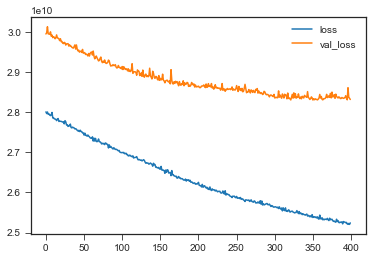

In [74]:
losses.plot()

<AxesSubplot:>

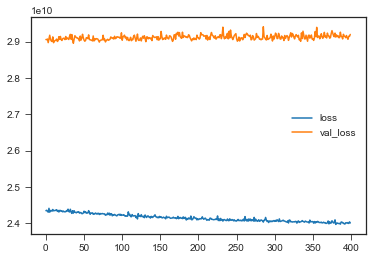

In [78]:
losses.plot()

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [80]:
y_pred = model.predict(X_test)

In [81]:
mean_absolute_error(y_test, y_pred)

102075.17645760995

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

170866.8683708777

In [83]:
df["price"].mean()

540296.5735055795

In [84]:
explained_variance_score(y_test,y_pred)

0.7799999357687735

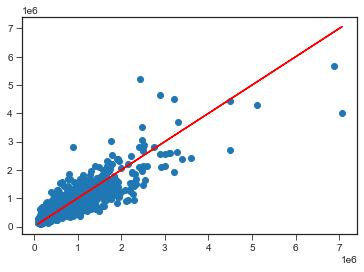

In [85]:
# Our predictions
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [93]:
single_house = df.drop('price',axis=1).iloc[5]

In [94]:
single_house

bedrooms              4.0000
bathrooms             4.5000
sqft_living        5420.0000
sqft_lot         101930.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                11.0000
sqft_above         3890.0000
sqft_basement      1530.0000
yr_built           2001.0000
yr_renovated          0.0000
lat                  47.6561
long               -122.0050
sqft_living15      4760.0000
sqft_lot15       101930.0000
month                 5.0000
year               2014.0000
Name: 5, dtype: float64

In [89]:
#model.predict(single_house) #ERROR!! MUST BE SCALED!

ValueError: in user code:

    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\TURBULENCE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 19 but received input with shape (None, 1)


In [90]:
single_house = scaler.transform(single_house)   #reshape to 2D!
model.predict(single_house)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.00000e+00  1.00000e+00  1.18000e+03  5.65000e+03  1.00000e+00
  0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.18000e+03
  0.00000e+00  1.95500e+03  0.00000e+00  4.75112e+01 -1.22257e+02
  1.34000e+03  5.65000e+03  1.00000e+01  2.01400e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
single_house = scaler.transform(single_house.values.reshape(-1,19))  #reshape to 2D!
model.predict(single_house)

array([[1428102.9]], dtype=float32)

In [96]:
df.iloc[5]

price            1.230000e+06
bedrooms         4.000000e+00
bathrooms        4.500000e+00
sqft_living      5.420000e+03
sqft_lot         1.019300e+05
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.100000e+01
sqft_above       3.890000e+03
sqft_basement    1.530000e+03
yr_built         2.001000e+03
yr_renovated     0.000000e+00
lat              4.765610e+01
long            -1.220050e+02
sqft_living15    4.760000e+03
sqft_lot15       1.019300e+05
month            5.000000e+00
year             2.014000e+03
Name: 5, dtype: float64